# K-Means Clustering (Simple Demo)

Create our sample dataset

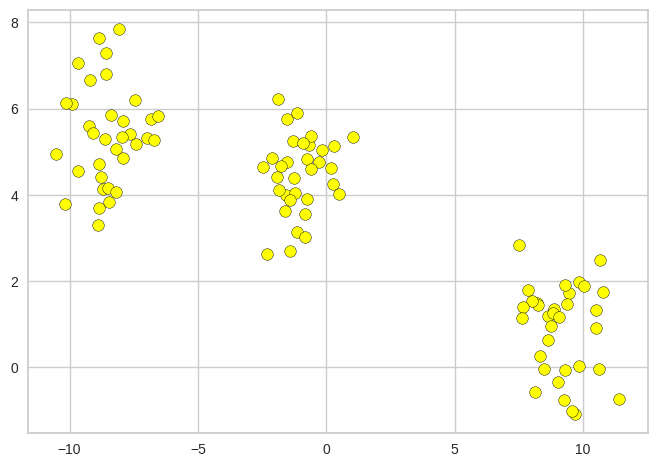

In [25]:
# Let's make a dataset that we'll use to demo KNN

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# We use make_blobs to create a 200 samples, of two classes with 3 centers

X, Y = make_blobs(n_samples = 100, n_features = 2, centers = 3, cluster_std = 1, shuffle = True, random_state = 7)

# plot our points

plt.scatter(X[:, 0], X[:, 1], c = 'yellow', marker = 'o', edgecolor = 'black', s=70)
plt.show()

Use Sklearn's KMeans Class

In [26]:
from sklearn.cluster import KMeans

# We set k = 3 for this first trial

model = KMeans(n_clusters = 3, random_state = 0, n_init = 10)
predictions = model.fit_predict(X)

In [27]:
predictions

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2,
       0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1,
       2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 1,
       2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1], dtype=int32)

Create Visualizations for each Cluster

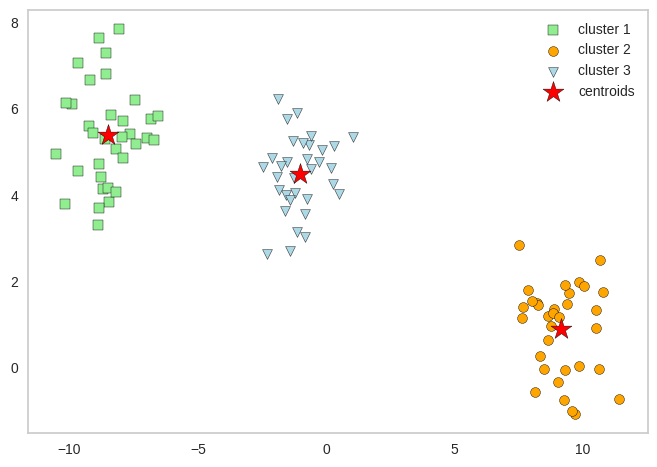

In [28]:
# Plot the 3 clusters

plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[predictions == 2, 0], X[predictions == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')

# Plot the centroids

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
            s=250, marker='*',c='red', edgecolor='black',label='centroids')

plt.legend(scatterpoints=1)

plt.grid()

# Apply the Elbow Method using Sum Squared Distances (Inertia)

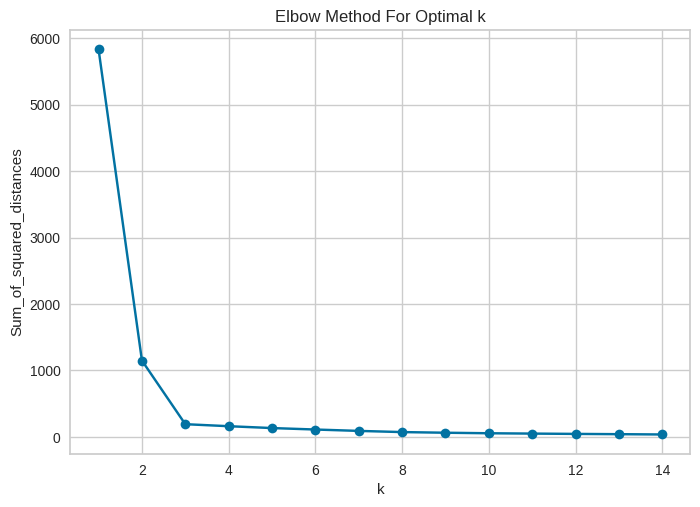

In [29]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)

for k in K:

    model = KMeans(n_clusters = k, n_init = 10, random_state = 0)
    km = model.fit(X)

    # Get sum of square distances by applying km.inertia_
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results

plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Analysis

In [30]:
# Install yellowbrick
#!pip install yellowbrick

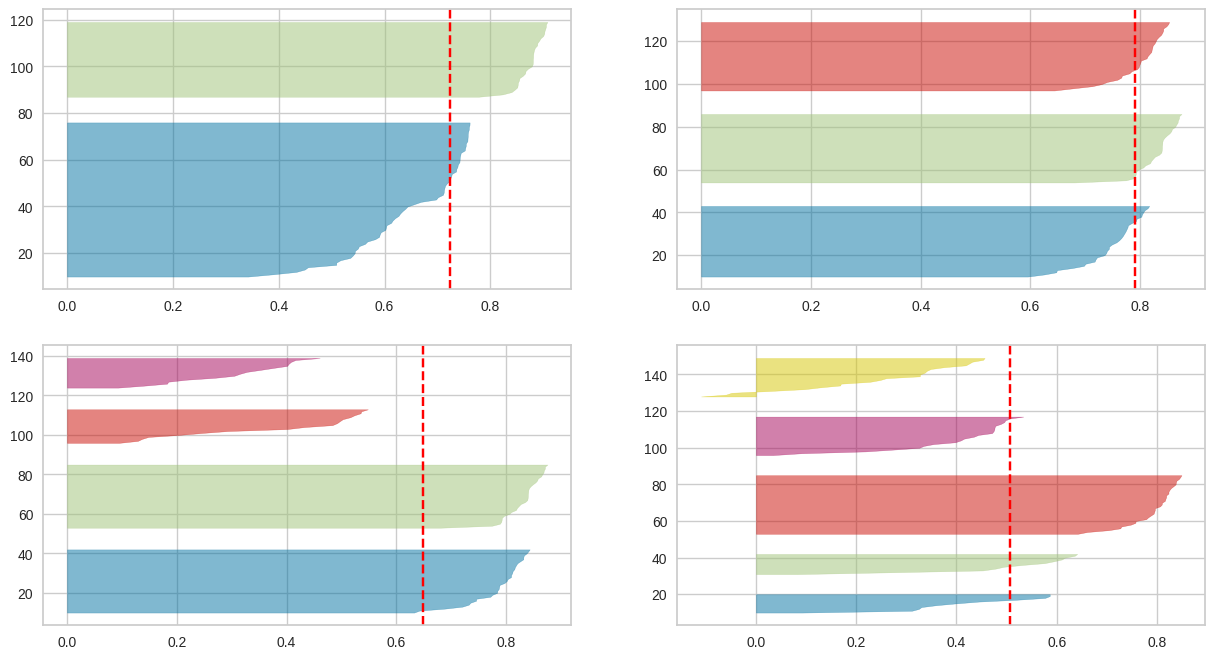

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2,2, figsize = (15,8))

for i in [2, 3, 4, 5]:

  model = KMeans(n_clusters = i, n_init = 10, random_state = 0)
  q, mod = divmod(i, 2)

  visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick', ax = ax[q - 1][mod])
  visualizer.fit(X)